#maxcut
頂点を２つのグループに分けるような辺の切り方のうち、一番最大数のものを探します。イジング問題で解くときには、隣り合う頂点同士がなるべく異なる符号に落ちるようにエネルギー関数の最小値を探していきます。今回、ノード間のエッジの重みは1として固定し、maxcutをときます。

##maxcutの例題
例題として5ノード、6エッジの下記のようなグラフを解いてみます。
ノード間のエッジの重みはすべて+1とします。

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


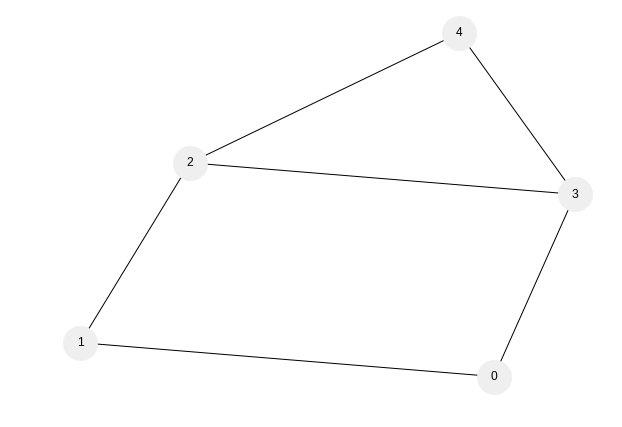

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

options = {'node_color': '#efefef','node_size': 1200,'with_labels':'True'}

G = nx.Graph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([(0,1),(0,3),(1,2),(2,3),(2,4),(3,4)])
nx.draw(G, **options)

maxcutのコスト関数一般式は、頂点の量子ビットが{-1,1}をとりうるとして、

<img class="math math-inline" src="https://render.githubusercontent.com/render/math?math=E%20%3D%20-%5Csum_%7Bi%2Cj%7D%20%5Cfrac%7B1%7D%7B2%7D(1-q_iq_j)">

ノードが等しいとコストが高くなるようになっています。今回は５ノードあるので、コスト関数は下記のように代入できます。

<img src="https://render.githubusercontent.com/render/math?math=E%20%3D%20-%5Cfrac%7B1%7D%7B2%7D%5Cbigl%5B(1-q_0q_1)%2B(1-q_0q_3)%2B(1-q_1q_2)%2B(1-q_2q_3)%2B(1-q_3q_4)%2B(1-q_2q_4)%20%20%5Cbigr%5D%5C%5C%0D%0A%3D%5Cfrac%7B1%7D%7B2%7D(q_0q_1%2Bq_0q_3%2Bq_1q_2%2Bq_2q_3%2Bq_3q_4%2Bq_2q_4)-3">

こちらをイジングに入れて計算します。普段はQUBOで{0,1}で計算を行いますが、今回は{-1,1}のまま計算して見ます。


In [0]:
!pip install -U wildqat

In [0]:
import wildqat as wq
import numpy as np
a = wq.opt()
a.J = [[0,0.5,0,0.5,0],[0,0,0.5,0,0],[0,0,0,0.5,0.5],[0,0,0,0,0.5],[0,0,0,0,0]]
a.sa()

1.5964267253875732


[1, 0, 1, 0, 0]

上記ノードは0番目と2番目が1、その他が0なので、これでとけました。

<img src="./img/022_0.png">

上記のように分割できます。
以上でmaxcutがとけました。